# Tutorials for The Japan COVID-19 Task Force (JCTF) whole blood RNA-seq analysis

In this notebook we will go through some examples of analysing the summary data of the JCTF whole blood RNA-seq. 



## Reading the summary data
The summary stats of cis/trans eQTL and cis-sQTL analysis are available at the publicly available at the [NBDC Human Database (ID: hum0343.v2)](https://humandbs.biosciencedbc.jp/en/hum0343-v2), and can be downloaded as below:

In [30]:
#Download the public release data (This will take some time. Total data size = 713M):
from google.colab import drive
drive.mount('/gdrive')
!mkdir /gdrive/MyDrive/jctf_rna_tutorial_data
!curl https://humandbs.biosciencedbc.jp/files/hum0343/hum0343.v2.qtl.v1.zip > /gdrive/MyDrive/jctf_rna_tutorial_data/hum0343.v2.qtl.v1.zip
!unzip /gdrive/MyDrive/jctf_rna_tutorial_data/hum0343.v2.qtl.v1.zip -d /gdrive/MyDrive/jctf_rna_tutorial_data/

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [25]:
#check the downloaded files:
!ls /gdrive/MyDrive/jctf_rna_tutorial_data/hum0343.v2.qtl.v1

taskforce_rna_releasedata_cis_eqtls.tsv.gz
taskforce_rna_releasedata_cis_sqtls.tsv.gz
taskforce_rna_releasedata_trans_eqtls.tsv.gz


## cis-eQTL data
The cis-eQTL data includes all the variant-gene pairs with p<0.05. 
More details of the data can be found in the [NBDC page](https://humandbs.biosciencedbc.jp/en/hum0343-v2).

In [29]:
#read the cis-eQTL file:
import pandas as pd
cise = pd.read_csv("/gdrive/MyDrive/jctf_rna_tutorial_data/hum0343.v2.qtl.v1/taskforce_rna_releasedata_cis_eqtls.tsv.gz", sep='\t')
cise

,variant_id_hg19,variant_id_hg38,rsid,gene_id,tss_distance,ma_samples,ma_count,maf,pval_nominal,slope,slope_se,pip_fm,pip_susie,ref_is_minor
0,10:101759992:C:T,chr10:100000235:C:T,rs11596870,ENSG00000075826.17,-519629,140,152,0.163441,1.493870e-02,0.086855,0.035530,0.000000,0.000000e+00,False
1,10:101759992:C:T,chr10:100000235:C:T,rs11596870,ENSG00000095485.18,-267445,140,152,0.163441,3.479400e-02,0.061615,0.029091,0.000000,4.446256e-10,False
2,10:101759992:C:T,chr10:100000235:C:T,rs11596870,ENSG00000107566.14,-185798,140,152,0.163441,1.279440e-02,-0.078415,0.031357,NaN,NaN,False
3,10:101759992:C:T,chr10:100000235:C:T,rs11596870,ENSG00000107554.17,-9712,140,152,0.163441,3.538820e-07,0.157421,0.030391,0.000132,2.647274e-05,False
4,10:101759992:C:T,chr10:100000235:C:T,rs11596870,ENSG00000227695.5,73225,140,152,0.163441,3.395700e-02,0.158658,0.074559,NaN,NaN,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12393200,9:102761603:G:C,chr9:99999321:G:C,rs1881752,ENSG00000023318.8,-99679,187,215,0.231183,2.342090e-02,0.035514,0.015609,NaN,NaN,False
12393201,9:102761603:G:C,chr9:99999321:G:C,rs1881752,ENSG00000136874.11,92667,187,215,0.231183,2.208270e-07,0.129163,0.024495,0.000784,3.791520e-04,False
12393202,9:102761615:T:C,chr9:99999333:T:C,rs145565980,ENSG00000066697.14,-427823,11,11,0.011828,4.078140e-02,0.235593,0.114787,NaN,NaN,False
12393203,9:102761615:T:C,chr9:99999333:T:C,rs145565980,ENSG00000119509.13,-99910,11,11,0.011828,2.792130e-02,-0.360764,0.163501,0.000015,2.355546e-03,False


As a first example, we will bin the posterior inclusion probability (PIP) and the distance to transcription starting site (TSS), and check that the putative causal variants are distributed closer to the TSS. 

In [37]:
#e.g. check the TSS distance distribution per PIP
import numpy as np
cise["min_pip"] = np.minimum(cise.pip_fm, cise.pip_susie)
cise["min_pip_bin"] = "0 or NA"
cise.loc[cise.min_pip>0, "min_pip_bin"] = "(0,0.01]"
cise.loc[cise.min_pip>0.01, "min_pip_bin"] = "(0.01,0.1]"
cise.loc[cise.min_pip>0.1, "min_pip_bin"] = "(0.1,0.9]"
cise.loc[cise.min_pip>0.9, "min_pip_bin"] = "(0.9,1]"

cise["tss_dist_bin"] = "<10^3"
cise.loc[abs(cise.tss_distance)>10**3, "tss_dist_bin"] = "(10^3,10^4]"
cise.loc[abs(cise.tss_distance)>10**4, "tss_dist_bin"] = "(10^4,10^5]"
cise.loc[abs(cise.tss_distance)>10**5, "tss_dist_bin"] = "(10^5,10^6]"

tb = cise.groupby(["min_pip_bin","tss_dist_bin"]).size().unstack()
tb

tss_dist_bin,"(10^3,10^4]","(10^4,10^5]","(10^5,10^6]",<10^3
min_pip_bin,,,,
"(0,0.01]",153797,1162370,3048038,18104
"(0.01,0.1]",25182,79506,30325,4151
"(0.1,0.9]",4467,7879,2272,1238
"(0.9,1]",281,493,144,251
0 or NA,191659,1626924,6013013,23111


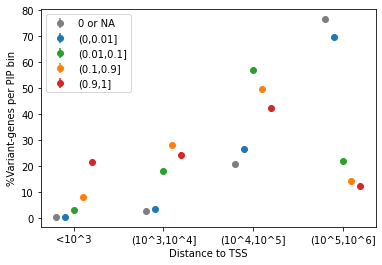

In [58]:
#visualize the enrichment, compared to random:
from matplotlib import pyplot as plt
cols = ["tab:gray", "tab:blue", "tab:green", "tab:orange", "tab:red"]
#tb = tb.iloc[[4,0,1,2,3],[3,0,1,2]] #manual re-ordering
tb_norm = (tb.T/tb.sum(axis=1)).T #normalize per PIP bin
tb_err = np.sqrt((tb_norm*(1-tb_norm)).T/tb.sum(axis=1)).T #standard error of mean
x = np.arange(tb_norm.shape[1])
for i in range(tb_norm.shape[0]):
  plt.errorbar(-0.2+x+i*0.1, tb_norm.iloc[i,:]*100, tb_err.iloc[i,:]*100, color=cols[i], label=tb_norm.index[i], fmt="o")
plt.xticks(x, tb_norm.columns)
plt.xlabel("Distance to TSS")
plt.ylabel("%Variant-genes per PIP bin")
plt.legend()
plt.show()

As a second example, we will plot the p-value as well as PIP for a specific gene of interest (TBX6 in this example):

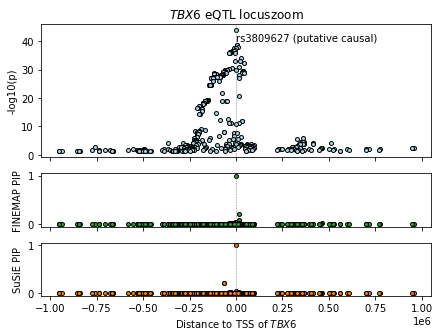

In [74]:
#e.g. visualize the results for a gene TBX6:
#(no LD color, for siplicity)
g = cise.loc[cise.gene_id=="ENSG00000149922.10",:].sort_values(by="pval_nominal")
f, (ax1, ax2, ax3) = plt.subplots(3, 1, sharex=True, figsize=(7,5), gridspec_kw={'height_ratios': [5, 2, 2]})
ax1.scatter(g.tss_distance, -np.log10(g.pval_nominal), color="lightblue", s=16, edgecolors="black")
ax2.scatter(g.tss_distance, g.pip_fm, color="tab:green", s=16, edgecolors="black")
ax3.scatter(g.tss_distance, g.pip_susie, color="tab:orange", s=16, edgecolors="black")
ax3.set_xlabel("Distance to TSS of $TBX6$")
ax1.set_ylabel("-log10(p)")
ax2.set_ylabel("FINEMAP PIP")
ax3.set_ylabel("SuSiE PIP")
x = g.tss_distance.values[0]#the causal variant position
ax1.axvline(x=x, linestyle="--", linewidth=0.5, color="tab:gray")
ax2.axvline(x=x, linestyle="--", linewidth=0.5, color="tab:gray")
ax3.axvline(x=x, linestyle="--", linewidth=0.5, color="tab:gray")
ax1.text(x=x, y = 40, s="rs3809627 (putative causal)")
ax1.set_title("$TBX6$ eQTL locuszoom")
plt.show()

We can clearly see that there is a single putative causal variant (rs3809627 = chr16:30091839:C:A in hg38) having high PIP. 

## Trans-eQTL data

The trans-eQTL data includes all the variant-gene pairs with p<5e-8. More details of the data can be found in the NBDC page.

In [31]:
#read the trans-eQTL file:
import pandas as pd
transe = pd.read_csv("/gdrive/MyDrive/jctf_rna_tutorial_data/hum0343.v2.qtl.v1/taskforce_rna_releasedata_trans_eqtls.tsv.gz", sep='\t')
transe

,variant_id_hg19,variant_id_hg38,rsid,phenotype_id,af,pval,b,b_se
0,10:109971840:T:C,chr10:108212082:T:C,rs2263606,ENSG00000169410.9,0.168919,2.714499e-08,-0.155755,0.027458
1,10:10925636:C:T,chr10:10883673:C:T,rs9424106,ENSG00000172602.11,0.095556,8.552713e-09,-0.371294,0.063110
2,10:10928901:G:C,chr10:10886938:G:C,rs9424108,ENSG00000172602.11,0.091429,1.667924e-08,-0.366608,0.063623
3,10:10930210:A:G,chr10:10888247:A:G,rs7099477,ENSG00000172602.11,0.898553,1.315145e-08,0.359929,0.061998
4,10:10933275:G:A,chr10:10891312:G:A,rs9424109,ENSG00000172602.11,0.092614,1.330405e-08,-0.359507,0.061948
...,...,...,...,...,...,...,...,...
73076,9:99852502:A:C,chr9:97090220:A:C,rs149630653,ENSG00000232063.1,0.063901,6.303733e-09,0.681855,0.114829
73077,9:99852517:A:G,chr9:97090235:A:G,rs144413887,ENSG00000232063.1,0.063901,6.303733e-09,0.681855,0.114829
73078,9:99852751:A:T,chr9:97090469:A:T,rs148770393,ENSG00000232063.1,0.063987,6.425167e-09,0.680572,0.114679
73079,9:99852832:G:T,chr9:97090550:G:T,rs118110492,ENSG00000232063.1,0.063584,6.757959e-09,0.679369,0.114651


Just as a proof of concept, if we would like to explore how many gene a variant regulate:

In [33]:
#e.g. when we want to check the number of trans-genes per variant:
transe.groupby("variant_id_hg38").size().value_counts()

1     38462
2      7630
3      3527
4       914
5       827
6       114
7        36
8         4
9         1
10        1
dtype: int64

We can see that, although most variants regulate one gene in trans, some variants regulate more than one gene. 

### End note

In this tutorial, we went through steps for reading the summary data of our analysis and exploring the cis and trans eQTL data. 

If users have more questions, feel free to contact Qingbo S Wang (qingbow[at]sg.med.osaka-u.ac.jp). 